In [1]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

print("done")

done


In [18]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis

full_filename = "../data/by_article_fulltext_020920.jl"
advice_filename = "../data/genre_advice_full_021520.jl"
wl_filename = "../data/genre_WL_full_021520.jl"
policy_filename = "../data/genre_CP_full_021520.jl"


full_df = imp.init_df(full_filename, "full")
advice_sec_df = imp.init_df(advice_filename, "full")
wl_sec_df = imp.init_df(wl_filename, "full", genre="WL")
policy_sec_df = imp.init_df(policy_filename, "full")

full_df = full_df[full_df.year<2020]

print("done")


done


In [56]:
full_df["probnews"] = np.where(
        (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
        "yes",
        "no",
    )

full_df = full_df.drop(["bio", "time", "column1", "column2"], axis=1,)

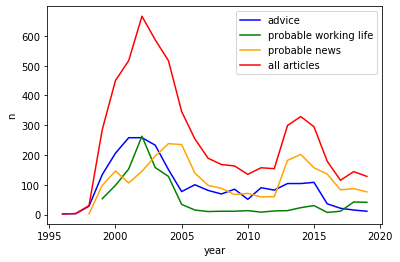

In [57]:
full_vis = vis.prep_per(full_df, group_by = "year", color = "red", test = False)

one_time_df = full_df[full_df.one_time == "yes"]
advice_df = full_df[full_df.advice == "yes"]
probnews_df = full_df[full_df.probnews == "yes"]

advice_vis = vis.prep_per(advice_df, group_by = "year")
one_time_vis = vis.prep_per(one_time_df, group_by = "year")
probnews_vis = vis.prep_per(probnews_df, group_by = "year")

sns.lineplot(x = "year", y = "n", color = "blue", legend="full", label="advice", data = advice_vis) 
sns.lineplot(x = "year", y = "n", color = "green", legend="full", label="probable working life", data = one_time_vis)
sns.lineplot(x = "year", y = "n", color = "orange", legend="full", label="probable news", data = probnews_vis)
sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

In [70]:
one_time_df[one_time_df.date_seq>7057].sort_values(by=["date_seq"]).head(3)

empties=0
wl_tags=0
for tags in wl_sec_df.tags:
    # print(tags)
    if tags =="[]":
        empties +=1
    elif "working life" in tags:
        wl_tags+=1

print(empties)
print(wl_tags)
print(len(wl_sec_df))

print("#################")

empties=0
wl_tags=0
for tags in full_df.tags:
    if tags=="[]":
        empties+=1
    elif "working life" in tags:
        wl_tags+=1

print(empties)
print(wl_tags)
print(len(full_df))

108
116
224
#################
12
145
6112


In [49]:
# test advice for coverage

print(len(one_time_df.date_seq>6443))
print(len(advice_sec_df))

1134
2364


In [35]:


print(len(one_time_df[one_time_df.year>2013]))
print(len(wl_sec_df))

154
224


In [54]:
print(len(probnews_df[probnews_df.date_seq>7057]))
print(len(policy_sec_df))

372
66
